In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [42]:
items=pd.read_csv('item_to_id.csv')
purchase_history=pd.read_csv('purchase_history.csv')

In [7]:
items.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [5]:
purchase_history.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


### 1. the customer who bought the most items overall in her lifetime

Function to get the count of any customer 

In [12]:
l=purchase_history['id'].apply(lambda x: len(x.split(',')))
purchase_history['count']=l 

group_user_count= purchase_history.groupby('user_id')['count'].sum().reset_index()
user_with_max_count=group_user_count[group_user_count['count']==max(group_user_count['count'])].user_id

In [19]:
user_with_max_count

4445    269335
Name: user_id, dtype: int64

In [14]:
max(group_user_count['count'])

72

Hence the user with user_id 269335 bought the maximum number of items and his total was 72 items.

### 2. for each item, the customer who bought that product the most

In [32]:
def item_counts_by_user(same_user_df):
    # 'sum' here is adding two lists into one big list
    all_item_ids = same_user_df['id'].str.split(',').sum()
    
    
    
    return pd.Series(Counter(int(id) for id in all_item_ids))

In [43]:
user_item_counts = purchase_history.groupby("user_id").apply(item_counts_by_user).unstack(fill_value=0)

In [44]:
user_item_counts.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
1216948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680382,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
383133,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1005913,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1019287,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0


In [45]:
max_user_byitem = user_item_counts.apply(lambda s: pd.Series([s.idxmax(), s.max()], index=["max_user", "max_count"]))
max_user_byitem = max_user_byitem.transpose()
max_user_byitem.index.name = "Item_id"

# join with item name
max_user_byitem = max_user_byitem.join(items).loc[:, ["Item_name", "max_user", "max_count"]]
max_user_byitem

,Item_name,max_user,max_count
Item_id,,,
1,tea,31625,4
2,juice,31625,5
3,soda,154960,4
4,sandwich loaves,5289,3
5,dinner rolls,217277,3
6,tortillas,334664,4
7,bagels,175865,3
8,canned vegetables,151926,3
9,spaghetti sauce,269335,4


In [49]:
# define the feature matrix: item_id, user_id
feature = user_item_counts.T
feature.head()

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
Item_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Applying PCA

In [50]:
pca=PCA()
pca.fit(feature)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We need to decide how many features we’d like to keep based on the cumulative variance plot.

Text(0, 0.5, 'Explained variance')

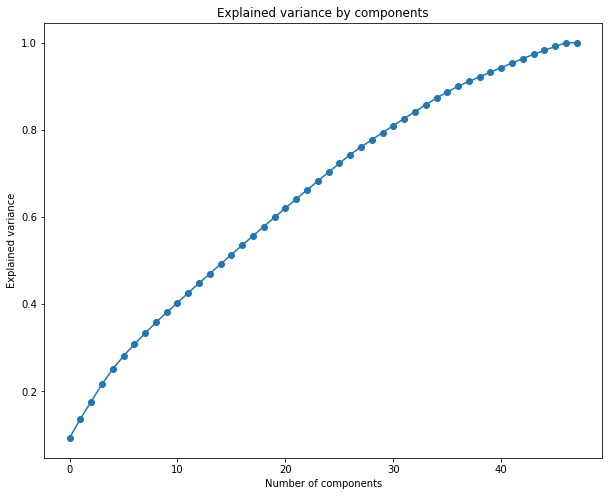

In [52]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

By general rule of thumb, we choose the number of principas components such that more than 80% of the variance is explained. Here, I am taking 47 components to explain almost 100% of the variance.

### Perform PCA with the chosen number of components

In [102]:
pca=PCA(n_components=47)
pca.fit(feature)
scores_pca=pca.transform(feature)

### Kmeans clustering : choosing the number of clusters using elbow method

In [103]:

wcss=[]
for i in range(3,30):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

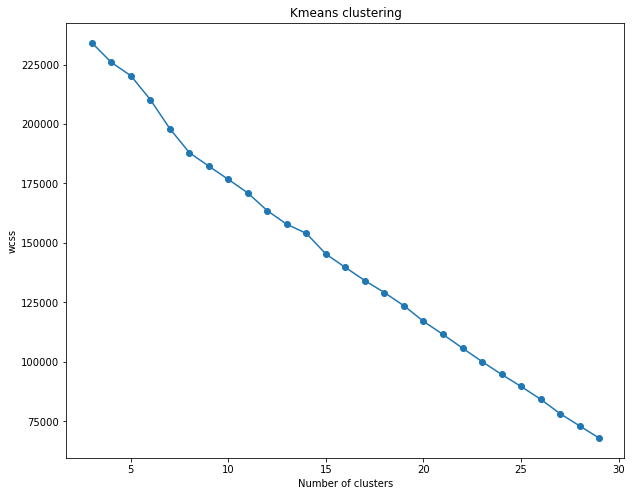

In [104]:
plt.figure(figsize=(10,8))
plt.plot(range(3,30),wcss,marker='o')
plt.title('Kmeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### Fit the final Model

I choose n_clusters as 15.

In [105]:
kmeans=KMeans(n_clusters=15,init='k-means++',random_state=42)
kmeans.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Visualization in 2-D

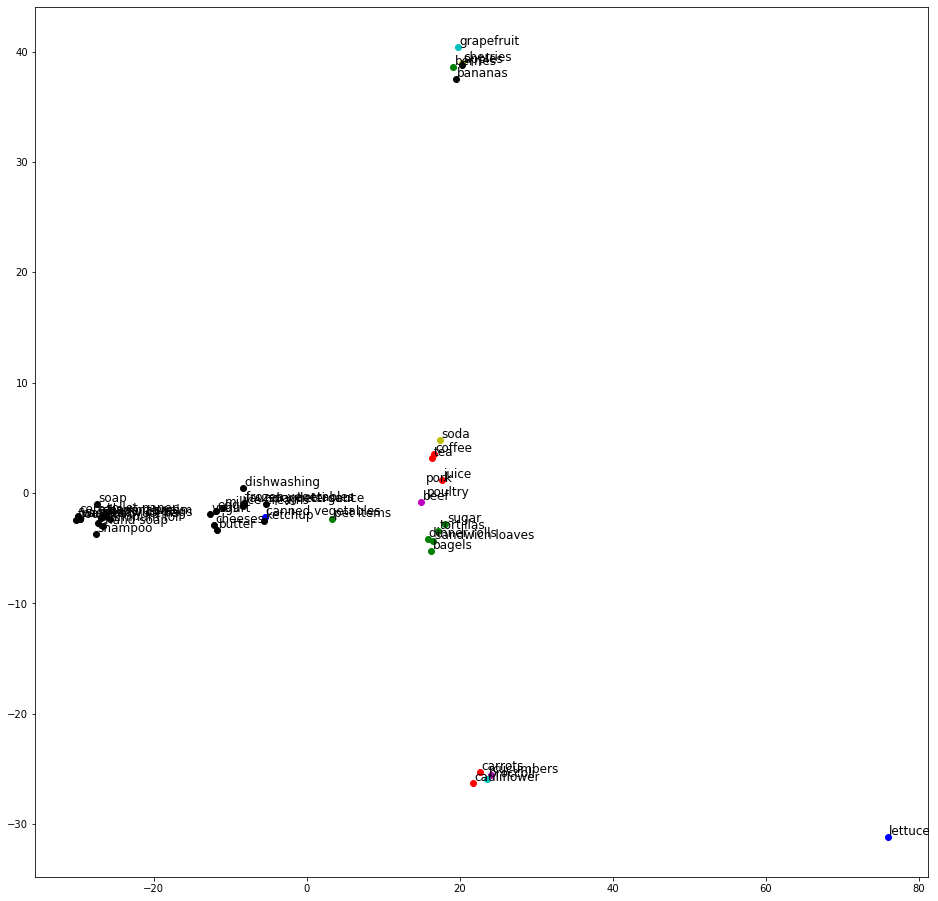

In [106]:
# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
label = kmeans.labels_
fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(scores_pca)):
    x = scores_pca[j][0] #Taking PC1
    y = scores_pca[j][1] #Taking PC2
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = items[items['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()

In [107]:
df = pd.DataFrame({'Item_id': list(range(1, 49)), 'label': label})
df = pd.merge(left=df, right=items, on='Item_id', how='left')

for i in range(0, 15):
    print(i, '\t', list(df[df['label'] == i]['Item_name']))

0 	 ['canned vegetables']
1 	 ['sugar', 'pet items', 'berries']
2 	 ['tea', 'juice', 'coffee']
3 	 ['grapefruit']
4 	 ['beef']
5 	 ['soda']
6 	 ['apples', 'bananas']
7 	 ['poultry', 'pork']
8 	 ['lettuce']
9 	 ['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
10 	 ['carrots', 'cauliflower']
11 	 ['broccoli']
12 	 ['cucumbers']
13 	 ['cherries']
14 	 ['baby items', 'waffles', 'sandwich bags', 'butter', 'cereals', 'shampoo', 'eggs', 'aluminum foil', 'milk', 'laundry detergent', 'shaving cream', 'cheeses', 'frozen vegetables', 'paper towels', 'spaghetti sauce', 'dishwashing\xa0', 'hand soap', 'flour', 'pasta', 'toilet paper', 'soap', 'ice cream', 'ketchup', 'yogurt']
